# Exercise 2


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
import math

warnings.filterwarnings('ignore')

%matplotlib inline
plt.rcParams['figure.figsize'] = 8,4

## Load Data
* The first two columns contains the exam scores and the third column
  contains the label.

In [2]:
data1 = np.loadtxt('C:\\Users\\Razi\\workDirectory\\MATHwork\\Machine learning\\ex2\\ex2data1.txt',delimiter=',')

dframe1 = pd.DataFrame(data1,columns=['examScore1','examScore2','Admitted'],dtype='float')
dframe1.Admitted = dframe1.Admitted.astype('bool')
dframe1.head()

,examScore1,examScore2,Admitted
0,34.623660,78.024693,False
1,30.286711,43.894998,False
2,35.847409,72.902198,False
3,60.182599,86.308552,True
4,79.032736,75.344376,True


In [3]:
# from dataframe to numpy arrays
X = dframe1.as_matrix()[:,:-1].astype('float') # data
y = dframe1.as_matrix()[:,-1].astype('int')    # labels

# m: number of examples
# n: number of features 
m ,n = X.shape

y = y.reshape(m,1)

# Add intercept term to X
X = np.c_[np.ones((m,1)), X]

# Initialize fitting parameters
initial_theta = np.zeros((n+1,1))

## Plotting the Data

In [4]:
def myPlot(X, y , theta=None):
    # plot the data
    sns.lmplot(data= dframe1, x='examScore1',y='examScore2',hue = 'Admitted',fit_reg=False , scatter_kws={"s":50},aspect=2)
    if theta != None: # plot the linear fit
        score1 = np.squeeze(np.asarray(np.matrix(np.linspace(30,100,num=200))))
        score2 = np.squeeze(np.asarray((-theta[0]-np.multiply(score1,theta[1]))/theta[2]))
        sns.plt.plot(score1,score2,'r')
    sns.plt.show()    
        

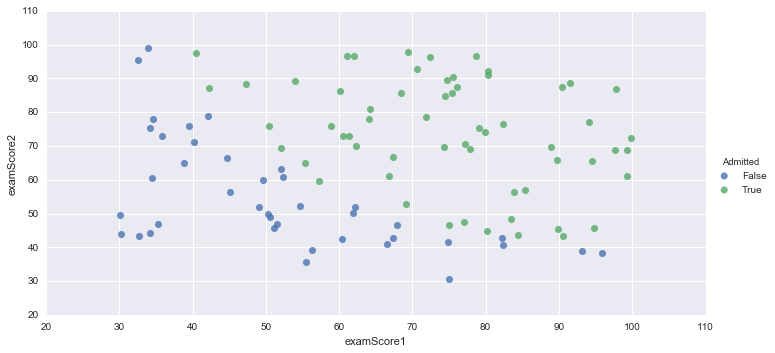

In [5]:
myPlot(X, y)

## Logistic regression:


In [6]:
def segmoid(z):
    return 1 / (1 + np.exp(-z))

In [7]:
def costFunction(theta, X, y):
    m = len(y)
    temp = np.ones((m,1))
    g = segmoid(X.dot(theta))
    for i in range(len(g)):
        if(g[i]==0):
            g[i]=1e-20
        elif(g[i]==1):
            g[i] = 1 - 1e-20
    # J(theta)
    J = -(np.dot(y.T, np.log(g)) + np.dot((temp-y).T, np.log(temp-g)))/m
    
    grad = np.dot(X.T, (h(X, theta)-y))/m 
    
    return J
                  

In [8]:
def h(X,theta):
    
    return segmoid(X.dot(theta))

In [9]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    m = len(y)
    #  for computing J(theta) after every iteration 
    J_history = np.zeros((num_iters,1))
    #  Gradient Descent:
    for it in range(num_iters):
        theta = theta - (alpha)* np.dot(X.T , (h(X,theta) - y))
        J_history[it] = costFunction(theta, X, y);
    
    return theta,J_history 

## Training the model:

In [23]:
theta, cost = gradientDescentMulti(X, y, initial_theta, 0.011, 200000)
theta

array([[-6844.22148096],
       [   53.74553809],
       [   53.23767642]])

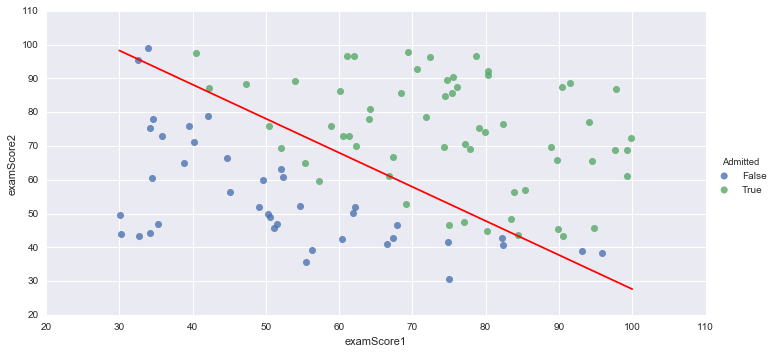

In [24]:
myPlot(X, y, theta)

## Training Error:

In [25]:
p = (h(X ,theta)>0.5).astype('int')
accuracy = np.mean(p==y)*100
print('The training accuracy is: %' + str(accuracy) )

The training accuracy is: %88.0


# Logistic Regression (with regularization)

## Load Data
* The first two columns contains the scores and the third column
  contains the label.

In [26]:
data2 = np.loadtxt('C:\\Users\\Razi\\workDirectory\\MATHwork\\Machine learning\\ex2\\ex2data2.txt',delimiter=',')

dframe2 = pd.DataFrame(data2,columns=['Microchip Test 1','Microchip Test 2','Good'],dtype='float')
dframe2.Admitted = dframe1.Admitted.astype('bool')
dframe2.head()

,Microchip Test 1,Microchip Test 2,Good
0,0.051267,0.69956,1.0
1,-0.092742,0.68494,1.0
2,-0.213710,0.69225,1.0
3,-0.375000,0.50219,1.0
4,-0.513250,0.46564,1.0


In [27]:
# from dataframe to numpy arrays
X2 = dframe2.as_matrix()[:,:-1].astype('float') # data
y2 = dframe2.as_matrix()[:,-1].astype('int')    # labels

# m: number of examples
# n: number of features 
m ,n = X2.shape

y2 = y2.reshape(m,1)

# Add intercept term to X
X_n = np.c_[np.ones((m,1)), X2]

# Initialize fitting parameters
initial_theta = np.zeros((n+1,1))

In [244]:
def myPlot2(X, y , theta=None):
    # plot the data
    sns.lmplot(data= dframe2, x='Microchip Test 1',y='Microchip Test 2',\
               hue = 'Good',fit_reg=False , scatter_kws={"s":80},aspect=1,size=8)
    z = z.T
    sns.plt.contour(u, v, z)
    sns.plt.title('lambda = %f' % 1)
    sns.plt.xlabel('Microchip Test 1')
    sns.plt.ylabel('Microchip Test 2')
    sns.plt.legend(['y = 1', 'y = 0', 'Decision boundary'])
    sns.plt.show()
    
    if theta != None: # plot the linear fit
        score1 = np.squeeze(np.asarray(np.matrix(np.linspace(30,100,num=200))))
        score2 = np.squeeze(np.asarray((-theta[0]-np.multiply(score1,theta[1]))/theta[2]))
        sns.plt.plot(score1,score2,'r')
    sns.plt.show()  

In [28]:
def mapFeature(X1, X2):
    # Inupts X1,X2 must be vectors with the same size
    # degree must be a positive integer. 
    # mapFeature(X1, X2) maps the two input features to quadratic features used in the regularization exercise.
    #Returns a new feature array with more features, comprising of  X1, X2, X1.^2, X2.^2, X1*X2, X1*X2.^2, etc..
    
    degree = 6
    m = len(X1)
    out = np.ones((m,28))
    k=0
    for i in range(0,6 + 1):
        for j in range(0,i + 1):
            out[:,k] = X1**(i-j) * X2**j
            k+=1
    return out

UnboundLocalError: local variable 'z' referenced before assignment

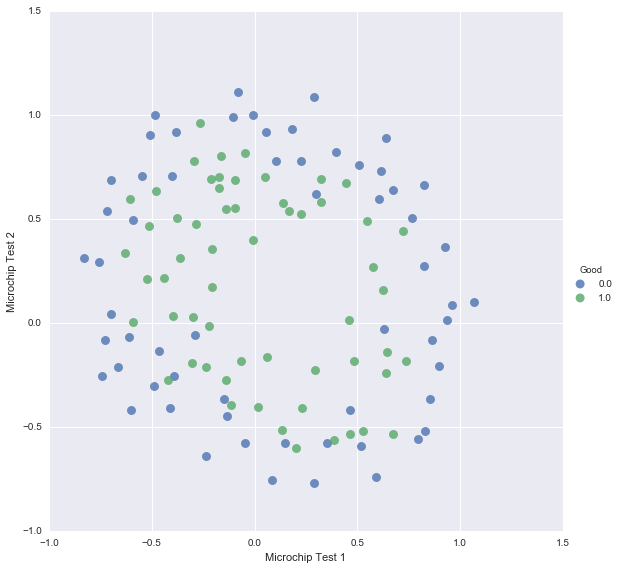

In [247]:
myPlot2(X2, y2,z)

In [30]:
X_n = mapFeature(X2[:,0],X2[:,1])
initial_theta2 = np.zeros((X_n.shape[1],1))
theta2,Cost2 = gradientDescentMulti(X_n, y2, initial_theta2, 0.015 ,100000)

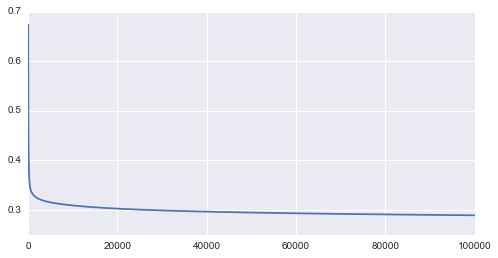

In [31]:
plt.plot(Cost2)

In [158]:
cnt =0
for i in range(1,6 + 1):
        for j in range(0,i + 1):
            cnt+=1
cnt

27

In [154]:
cnt

21

In [155]:
np.array(range(1,7))

array([1, 2, 3, 4, 5, 6])

In [32]:
p2 = (h(X_n ,theta2)>0.5).astype('int')
accuracy = np.mean(p2==y2)*100
print('The training accuracy is: %' + str(accuracy) )

The training accuracy is: %88.1355932203


In [34]:
def mapfeature(x1,x2,degree):
    x1.shape = (x1.size, 1)
    x2.shape = (x2.size, 1)
    degree = 6
    out = ones(shape=(x1[:, 0].size, 1))

    m, n = out.shape

    for i in range(1, degree + 1):
        for j in range(i + 1):
            r = (x1 ** (i - j)) * (x2 ** j)
            out = append(out, r, axis=1)

    return out

[[-136.43759229 -122.14292404 -110.08636868 ..., -193.04325199
  -228.53135172 -270.95106794]
 [-121.2374911  -107.61184425  -96.18131617 ..., -178.48502216
  -213.60245475 -255.69851764]
 [-108.17815224  -95.16054193  -84.29636089 ..., -166.57102073
  -201.46340852 -243.39033672]
 ..., 
 [-105.96643999  -82.67496052  -62.45512843 ..., -649.42355399
  -728.50991612 -819.54851444]
 [-104.48392686  -79.56761613  -57.93471789 ..., -718.51295554
  -801.08724307 -895.72235572]
 [-100.63806361  -74.03685002  -50.94897944 ..., -795.76199094 -882.2132024
  -980.83567222]]


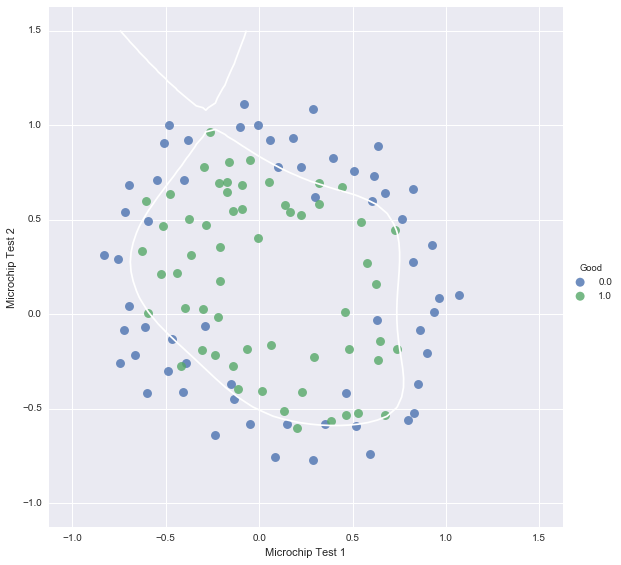

In [57]:
u = np.linspace(-1, 1.5, 50)
v = np.linspace(-1, 1.5, 50)
z = np.zeros(shape=(len(u), len(v)))

for i in range(len(u)):
    for j in range(len(v)):
        z[i, j] = (map_feature(np.array(u[i]), np.array(v[j])).dot(np.array(theta2)))

        
#sns.plt.scatter(X2[:,0],X2[:,1])
def myPlot2(X, y , theta=None):
    # plot the data
    u = np.linspace(-1, 1.5, 50)
    v = np.linspace(-1, 1.5, 50)
    z = np.zeros(shape=(len(u), len(v)))
    
    for i in range(len(u)):
        for j in range(len(v)):
            z[i, j] = (map_feature(np.array(u[i]), np.array(v[j]))).dot(np.array(theta2))
       
    sns.lmplot(data= dframe2, x='Microchip Test 1',y='Microchip Test 2',\
               hue = 'Good',fit_reg=False , scatter_kws={"s":80},aspect=1,size=8,)
    z = z.T
    print(z)
    plt.contour(u,v,z,1,args = 'b')
    
    if theta != None: # plot the linear fit
        score1 = np.squeeze(np.asarray(np.matrix(np.linspace(30,100,num=200))))
        score2 = np.squeeze(np.asarray((-theta[0]-np.multiply(score1,theta[1]))/theta[2]))
        sns.plt.plot(score1,score2,'r')
    sns.plt.show()  

myPlot2(X2,y2)

In [36]:
def map_feature(x1, x2):
    '''
    Maps the two input features to quadratic features.
    Returns a new feature array with more features, comprising of
    X1, X2, X1 ** 2, X2 ** 2, X1*X2, X1*X2 ** 2, etc...
    Inputs X1, X2 must be the same size
    '''
    x1.shape = (x1.size, 1)
    x2.shape = (x2.size, 1)
    degree = 6
    out = np.ones(shape=(x1[:, 0].size, 1))

    m, n = out.shape

    for i in range(1, degree + 1):
        for j in range(i + 1):
            r = (x1 ** (i - j)) * (x2 ** j)
            out = np.append(out, r, axis=1)

    return out

In [49]:
def mapFeature2(x1,x2,degree):
    
    x1.shape = (x1.size, 1)
    x2.shape = (x2.size, 1)
    degree = 6
    out = np.ones(shape=(x1[:, 0].size, 1))

    m, n = out.shape
    out = np.ones(x1.shape[0]).T
    for i in range(1,degree+1):
        for j in range(i+1):
            out = np.c_[out,x1**(i-j) * x2**j]
    return out

In [50]:
def plotDecisionBoundary(X,degree):
    x1Array = np.linspace(np.min(X[:,1]),np.max(X[:,1]),num=50)
    x2Array = np.linspace(np.min(X[:,2]),np.max(X[:,2]),num=50)
    z = np.zeros((len(x1Array),len(x2Array)))
    for i in range(len(x1Array)):
        for j in range(len(x2Array)):
            z[i,j] = mapFeature2(np.matrix(x1Array[i]),np.matrix(x2Array[j]),degree)*theta
    plt.contour(x1Array,x2Array,z,1)

In [51]:
plotDecisionBoundary(X,6)

ValueError: shapes (1,28) and (3,1) not aligned: 28 (dim 1) != 3 (dim 0)